In [51]:
import pickle as pk
import matplotlib.pylab as plt
import numpy as np
from numpy.linalg import norm
from math import sqrt, exp
%matplotlib inline
from PyKEP import *
import seaborn as sns
sns.set_style("whitegrid")

In [52]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

We load the data file obtained from the optimization (in low-thrust) of many legs (GTOC7) for the maximum initial mass: 

ast1, ast2, $t_1$, $t_2$, $\Delta V_L$, $m^*$, $m^*_L$, $m^*_D$


We want to study how well $m^*_D$ and $m^*_L$ approximate $m^*$


In [53]:
a = pk.load(open("slide14.pkl","rb"), encoding='latin1')
print("DATA = ", a)
print("ONE ROW = ", a[0])

DATA =  [[  5977.           1400.           9897.79452383 ...,    646.69563607
     994.50600015    637.50831973]
 [  2507.           9730.          10028.29892204 ...,    539.12499792
     869.83574819    546.50553877]
 [  1856.          11156.          10993.32082717 ...,   1164.91425949
    1662.96830277   1144.8375804 ]
 ..., 
 [  2097.          11680.          10398.22393722 ...,    540.10959251
     833.12551759    549.40812696]
 [  8134.          12125.          10338.53900687 ...,    598.86470679
     899.02791092    579.14941307]
 [  1157.          11128.           9603.24329705 ...,    778.95994963
    1493.31589298    808.14461016]]
ONE ROW =  [  5977.           1400.           9897.79452383  10057.79452383
   4170.11058695    646.69563607    994.50600015    637.50831973]


### Visualizing the data



In [80]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12

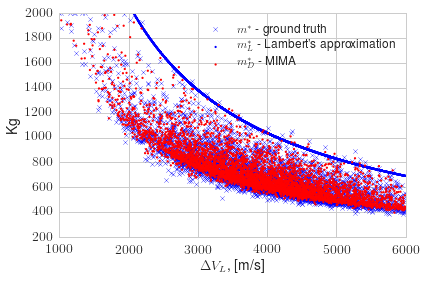

In [83]:
plt.figure()
skip=20
plt.scatter(  a[::skip,4], a[::skip,5], marker='x', alpha=1,edgecolor="none", label="$m^*$ - ground truth")
plt.scatter(  a[::skip,4], a[::skip,6], marker='.', color='b',alpha=1,edgecolor="none", label="$m_L^*$ - Lambert's approximation")
plt.scatter(  a[::skip,4], a[::skip,7], marker='.', color='r',alpha=1,edgecolor="none", label="$m_D^*$ - MIMA")
#plt.hexbin(  a[:,5]/a[:,4], a[:,7] / a[:,6], bins='log')
plt.ylabel("Kg")
plt.xlabel("$ \Delta V_L$, [m/s]")
plt.ylim(200,2000)
plt.xlim(1000,6000)

plt.legend()

plt.tight_layout(1)

plt.savefig(open("slide14.png", "w"))


In [108]:
b = a[a[:,5] < 2000]
b = b[b[:,5] > 500]
RMSE = np.sqrt(np.mean((b[:,5] - b[:,7])**2))
RMSE_LAMBERT = np.sqrt(np.mean((b[:,5] - b[:,6])**2))
MAE = np.mean(np.abs((b[:,5] - b[:,7])))
MAE_LAMBERT = np.mean(np.abs((b[:,5] - b[:,6])))

In [109]:
print(RMSE)
print(RMSE_LAMBERT)
print(MAE)
print(MAE_LAMBERT)

26.3928927093
477.004199057
20.4588626055
430.140514114


In [98]:
b[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [104]:
len(b)


89332